<a href="https://colab.research.google.com/github/Aranagut/Tejaswini_INFO5502_Spring2022/blob/main/lab_assignment_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The fourth Lab-assignment (02/17/2022, 50 points in total)

The purpose of this exercise is to understand Exploratory Data Analysis, we will practice the EDA by working on multiple datasets which have different characteristics.

Question 1 (15 points). Understand a text corpus for domain-specific text classification. Download the dataset from the following link: https://osf.io/8mjcy/ . Conduct EDA of the dataset from the following aspects:

(1) How many categories in total?

(2) How many documents under each category?

(3) What is the avergae number of sentence (on average)?

(4) What is the average number of words (on average)?

(5) Visualize the top 50 terms and rank the terms by frquency (remove stop words first: https://gist.github.com/sebleier/554280).

In [204]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [208]:
import os
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import PlaintextCorpusReader
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger') 

# 1st Question Answer
path = os.listdir("/content/gdrive/MyDrive/preprocessed_cases[cases_29404]")
print('{} categories are present'.format(len(path)))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
76 categories are present


In [231]:
# 2nd Question Answer
for i in path:
  docs = os.listdir("/content/gdrive/MyDrive/preprocessed_cases[cases_29404]/{}".format((i)))
  print('In file {} we have {} documents'.format(i,len(docs)))

In file 1 we have 678 documents
In file 10 we have 584 documents
In file 11 we have 605 documents
In file 12 we have 275 documents
In file 13 we have 458 documents
In file 14 we have 277 documents
In file 15 we have 257 documents
In file 16 we have 826 documents
In file 17 we have 125 documents
In file 18 we have 509 documents
In file 19 we have 349 documents
In file 2 we have 179 documents
In file 20 we have 1129 documents
In file 21 we have 735 documents
In file 22 we have 284 documents
In file 23 we have 179 documents
In file 24 we have 628 documents
In file 25 we have 244 documents
In file 26 we have 754 documents
In file 27 we have 77 documents
In file 28 we have 315 documents
In file 29 we have 213 documents
In file 3 we have 184 documents
In file 30 we have 881 documents
In file 31 we have 516 documents
In file 32 we have 118 documents
In file 33 we have 272 documents
In file 34 we have 786 documents
In file 35 we have 68 documents
In file 36 we have 889 documents
In file 37 we 

In [211]:
# 3rd Question Answer
import pandas as pd
sum = 0
for i in path:
    #print(i)
    docs = os.listdir("/content/gdrive/MyDrive/preprocessed_cases[cases_29404]/{}".format((i)))
    #print(docs)
    try:
        for file in docs:
            filepath = os.path.join("/content/gdrive/MyDrive/preprocessed_cases[cases_29404]", i, file)
            data = pd.read_csv(filepath, sep="\t")
            sum += data.shape[0]
        #print(sum)
    except:
        print(i, file)
print("The average no of sentences in all categories is:", round(sum/78, 2))
print("The average no of sentences in all files is:", round(sum/29404, 2))

60 case0.txt
The average no of sentences in all categories is: 11620.13
The average no of sentences in all files is: 30.82


In [217]:
# 4th Question Answer
import pandas as pd
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
sum = 0
for folder in path:
    docs = os.listdir("/content/gdrive/My Drive/preprocessed_cases[cases_29404]/{}".format((folder)))
    try:
        for file in docs:
            filepath = os.path.join("/content/gdrive/My Drive/preprocessed_cases[cases_29404]", folder, file)
            data = pd.read_csv(filepath, sep="\t")
            for col in data.columns:
                data[col] = data[col].apply(lambda x: [item for item in x.split() if ((item not in stop) and (len(item)!= 1))])
                
                for sent in data[col]:
                    sum += len(sent)
        #print(sum)
    except Exception as e:
        print(e)
        #print(i, file)
print("The average no of words in all categories is:", round(sum/78, 2))
print("The average no of words in all files is:", round(sum/29404, 2))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
No columns to parse from file
The average no of words in all categories is: 635176.19
The average no of words in all files is: 1684.93


In [218]:
!pip install stop_words

In [219]:
# 5th Question Answer
import re
import pandas as pd
from stop_words import get_stop_words
from nltk.corpus import stopwords
import nltk
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger') 

# creating a set of stop words that are obtained from STOPWORDS and stop_words
STOPWORDS = set(stopwords.words('english'))
stop_words = list(get_stop_words('en'))
# we combien both sets of stopwords to make a corpus of stopwords
stopwords = list(set(list(STOPWORDS)) | set(list(stop_words)))
stopwords = [re.sub('[^a-zA-Z0-9]+', '', word) for word in stopwords]
print(len(stopwords))
import os

list_of_words = []
path = os.listdir("/content/gdrive/MyDrive/preprocessed_cases[cases_29404]")
# we loop through each file and create a list of words
for folder in path:
    docs = os.listdir("/content/gdrive/MyDrive/preprocessed_cases[cases_29404]/{}".format((folder)))
    try:
        for file in docs:
            filepath = os.path.join("/content/gdrive/MyDrive/preprocessed_cases[cases_29404]", folder, file)
            
            data = pd.read_csv(filepath, sep="\t")
            for col in data.columns:
                data[col] = data[col].str.lower()
                data[col] = data[col].apply(lambda x: re.sub('[^A-Za-z0-9 ]+', '', x))
                data[col] = data[col].apply(lambda x: " ".join(item for item in x.split() if ((item not in stopwords) and (len(item)!= 1))))
                
                for sent in data[col]:
                    list_of_words.extend(sent.split())
       
    except Exception as e:
        print(e)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
211
No columns to parse from file


In [220]:
from collections import Counter
# we get the top 50 unique terms and their count
(Counter(list_of_words).most_common(50))

[('court', 811716),
 ('district', 326246),
 ('state', 208597),
 ('also', 192179),
 ('evidence', 172765),
 ('whether', 163988),
 ('may', 156868),
 ('law', 146628),
 ('states', 142517),
 ('claim', 137258),
 ('must', 136901),
 ('case', 136211),
 ('federal', 132729),
 ('trial', 130260),
 ('united', 128438),
 ('claims', 120157),
 ('one', 118012),
 ('judgment', 114733),
 ('order', 107865),
 ('government', 107843),
 ('action', 107166),
 ('first', 104143),
 ('defendant', 103612),
 ('section', 99979),
 ('review', 95792),
 ('two', 95522),
 ('act', 94367),
 ('issue', 93913),
 ('motion', 92917),
 ('decision', 92084),
 ('rule', 91990),
 ('time', 89554),
 ('new', 89544),
 ('plaintiff', 86154),
 ('jury', 84888),
 ('filed', 82128),
 ('made', 81337),
 ('public', 79991),
 ('plaintiffs', 79528),
 ('right', 78216),
 ('statute', 78169),
 ('found', 76281),
 ('supreme', 75587),
 ('defendants', 75147),
 ('held', 75131),
 ('parties', 73292),
 ('use', 71827),
 ('reasonable', 69498),
 ('based', 69111),
 ('within

In [221]:
from collections import Counter
counter_list = (Counter(list_of_words).most_common(50))

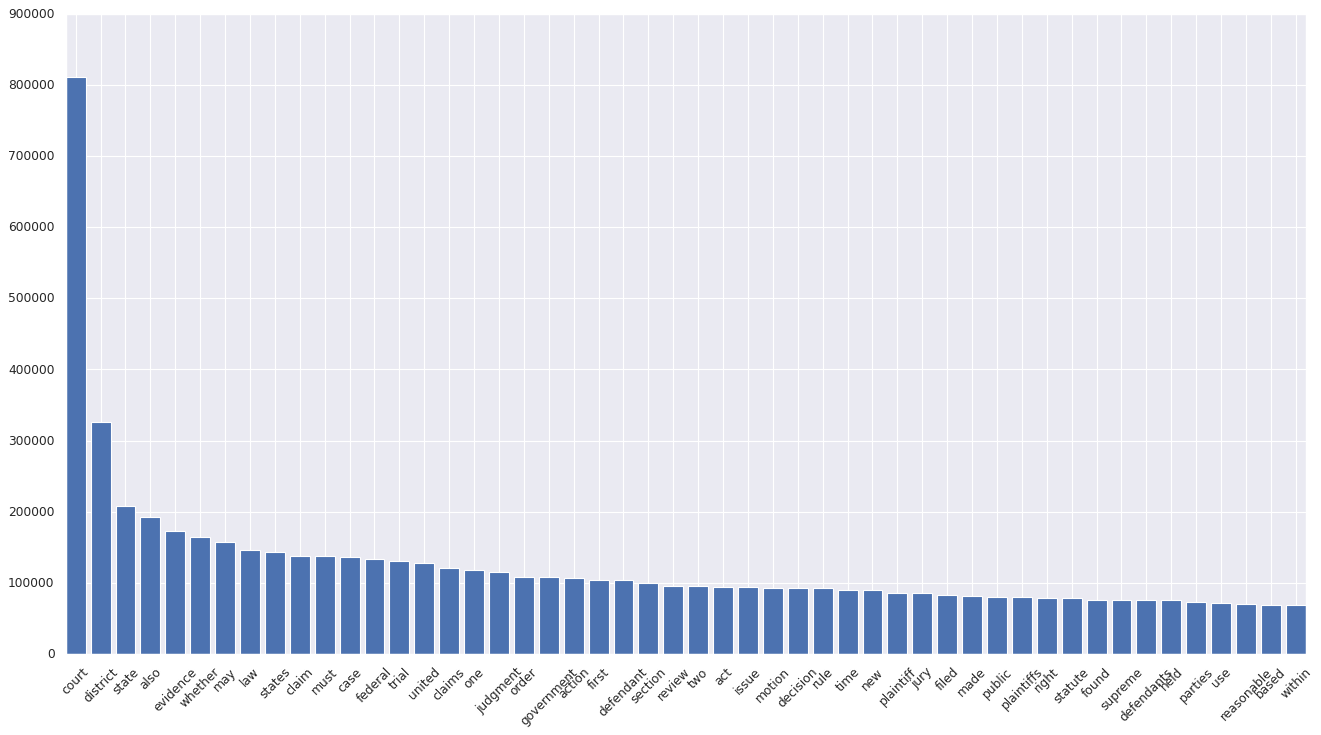

In [222]:
sns.set(rc = {'figure.figsize':(20,10)})
plt.bar(dict(counter_list).keys(), dict(counter_list).values())
plt.xticks(rotation =45)
plt.show()
#dict(counter_list).keys()

Question 2 (20 points). Continue practicing how to do simple exploratory data analysis with Python. The dataset that has been used in this question is called Student Academics Performance Data Set, which can be downloaded at: https://github.com/unt-iialab/info5502-spring2022/blob/main/datasets/lab-assignment-04-student-performance.csv . Please conduct the following analysis:

(1) Description of all the columns: for each colmun, count number of rows, number of unqiue element, the frequency of each unqiue element. 


(2)  Visualize the count for each value in the 'Study Hours' column. Note: Study Hours values comes from this >= 6 hours Good >= 4 hours Average < 2 hours Poor.

(3) Using factorplot to show the relationship between numerical and categorical value. Please use figure to show relation between [Study Hours] and [End Semester Percentage]. Percentage is calculated based on the following:

if percentage >=80 then Best
If percentage >= 60 but less than 80 then Very Good
If percentage >= 45 but less than 60 then Good
If Percentage >= 30 but less than 45 then Pass
If Percentage < 30 then Fail

(4) Get the correlation from the data, then plug it to heatmap function and show it as following:

In [188]:
# 1st Question answer here with code and explanation :

#Import Libraries
import pandas as pd
Link = 'https://raw.githubusercontent.com/unt-iialab/info5502-spring2022/main/datasets/lab-assignment-04-student-performance.csv'
# reading data from git
df_file = pd.read_csv(Link)
# we loop through each file and print the following details
for col in df_file.columns:
    print("Column:",col)
    print("The no of rows are:", df_file[col].shape[0])
    print("The no of unique values in this column are:", df_file[col].value_counts().shape[0])
    print(df_file[col].value_counts())
    print()

Column: ge
The no of rows are: 131
The no of unique values in this column are: 2
M    72
F    59
Name: ge, dtype: int64

Column: cst
The no of rows are: 131
The no of unique values in this column are: 5
OBC     57
G       44
ST      20
MOBC     6
SC       4
Name: cst, dtype: int64

Column: tnp
The no of rows are: 131
The no of unique values in this column are: 4
Good    59
Vg      38
Pass    25
Best     9
Name: tnp, dtype: int64

Column: twp
The no of rows are: 131
The no of unique values in this column are: 4
Good    65
Vg      44
Pass    17
Best     5
Name: twp, dtype: int64

Column: iap
The no of rows are: 131
The no of unique values in this column are: 4
Vg      63
Good    53
Best     8
Pass     7
Name: iap, dtype: int64

Column: esp
The no of rows are: 131
The no of unique values in this column are: 4
Good    54
Vg      42
Pass    27
Best     8
Name: esp, dtype: int64

Column: arr
The no of rows are: 131
The no of unique values in this column are: 2
N    78
Y    53
Name: arr, dtyp

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


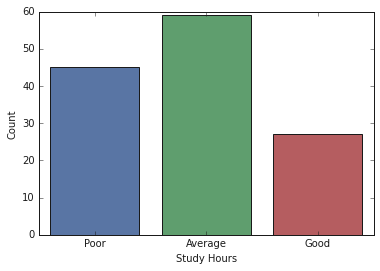

In [189]:
# 2nd Question answer here with code and explanation :

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.countplot(df_file['sh'])
plt.xlabel("Study Hours")
plt.ylabel("Count")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


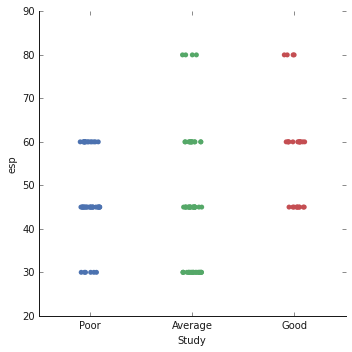

In [190]:
# 3rd Question answer here with code and explanation :

import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plt
df_file1 = pd.DataFrame()
df_file1['Study']=pd.DataFrame(df_file.sh)
df_file1['esp']=pd.DataFrame(df_file.esp)
df_file1['esp'].mask(df_file1['esp'] == 'Best', 80, inplace=True)
df_file1['esp'].mask(df_file1['esp'] == 'Vg', 60, inplace=True)
df_file1['esp'].mask(df_file1['esp'] == 'Good', 45, inplace=True)
df_file1['esp'].mask(df_file1['esp'] == 'Pass', 30, inplace=True)
df_file1['esp'].mask(df_file1['esp'] == 'Fail', 30, inplace=True)
df_file1['exampercent']=pd.DataFrame(df_file.esp)
sns.factorplot(x='Study',y='esp', kind = 'strip',data=df_file1)
plt.show()

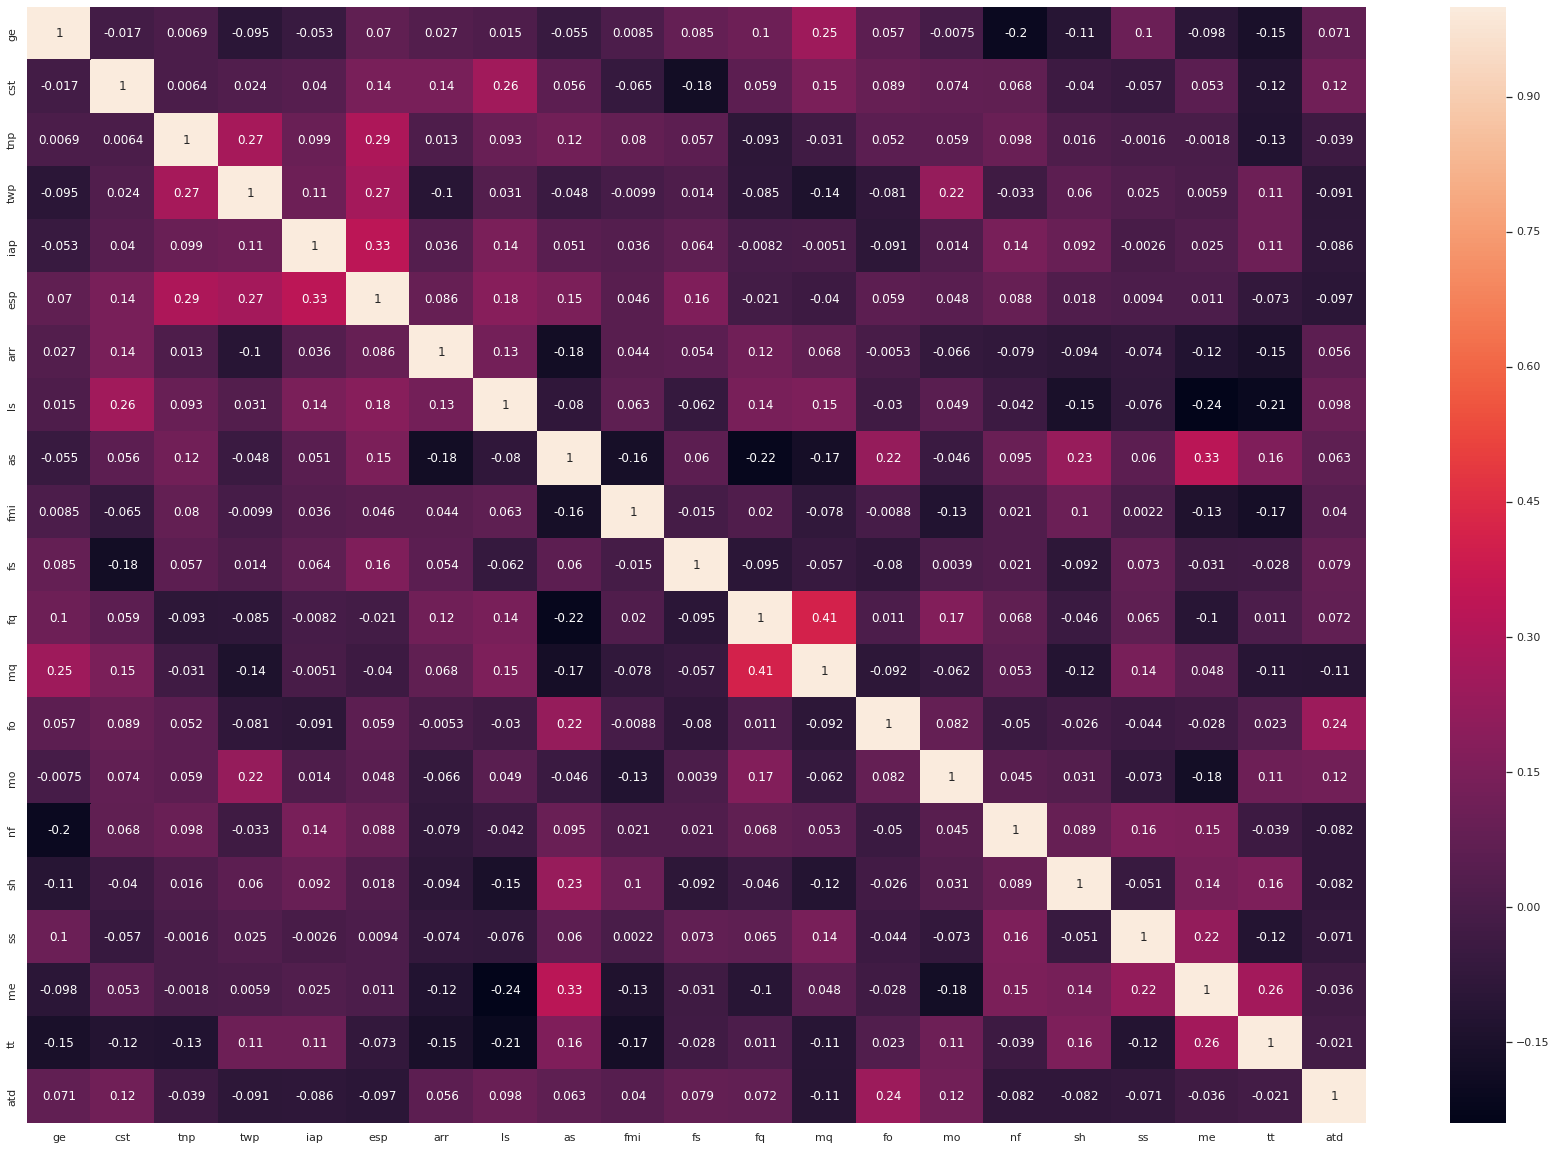

In [191]:
# 4th Question answer here with code and explanation :

#Import label library encoder 
from sklearn import preprocessing
import seaborn as sns
label_encoder = preprocessing.LabelEncoder()  
def Encoder(df_file):
    columnsToEncode = list(df_file.select_dtypes(include=['category','object']))
    le = preprocessing.LabelEncoder()
    # Convert categorical columns data into numerical data
    for feature in columnsToEncode:
        try:
            df_file[feature] = le.fit_transform(df_file[feature])
        except:
            print('Error encoding '+feature)
    return df_file
df_file1 = Encoder(df_file)

# Drop the ms column
df_file1 = df_file1.drop('ms', axis = 1)

# Correlation data
corr = df_file1.corr()
sns.set(rc = {'figure.figsize':(30,20)})
sns.heatmap(corr,annot=True)
plt.show()

Question 3 (15 points). Download a dataset from Kaggle or other sources. Propose three questions that you wanna to know from the dataset, then write python code to conduct EDA analysis to answer the three questions

# Three questions:

'''
I have considered Studnet Performance Data Set from Keggel and below are the 3 questions on the data set and its EDA analysis.

1) Is there a correlation between students’ reading and writing scores?

2) Are students scores dependent on their gender?

3) What is the distribution of students across gender, race/ethnicity, their lunch status, and whether they have a test preparation course or not?

'''

**Import libraries**

In [192]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.style
import matplotlib as mpl
mpl.style.use('classic')
from mpl_toolkits.mplot3d import Axes3D

**Load and read the file**

In [193]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [194]:
df = pd.read_csv("/content/drive/MyDrive/StudentPerformance Data Set.csv")
data

#Let us have a look at how our dataset looks like using df.head(). The output should look like this:

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [196]:
df.shape

(1000, 8)

In [197]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [198]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [199]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [200]:
df.isnull().sum() #checks if there are any missing values

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

**1st Question Answer**

*Relationship Analysis*

***Correlation matrix***

The correlation shows clearly that there is a strong positive linear relationship between students’ reading and writing scores. Writing scores tend to increase as reading scores increase.

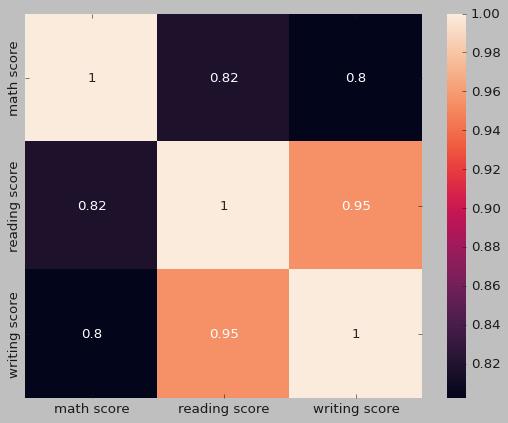

In [201]:
correlation = data.corr()
sns.heatmap(correlation,xticklabels=correlation.columns, yticklabels=correlation.columns,annot=True)

***2nd Question Answer***

***Distribution of Scores***

The below box plot shows that females have higher overall scores than males. This is indicated by the modal score and lowest score for the females being higher than that of the males. It is seen also that males have few outliers as compared to females.

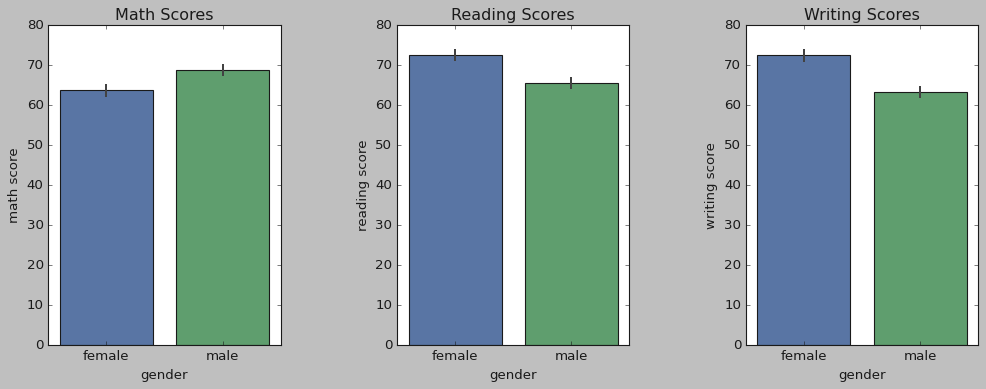

In [202]:
plt.figure(figsize=(15,5))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,
                      wspace=0.5, hspace=0.2)
plt.subplot(131)
plt.title('Math Scores')
sns.barplot(x="gender", y="math score", data=df)
plt.subplot(132)
plt.title('Reading Scores')
sns.barplot(x="gender", y="reading score", data=df)
plt.subplot(133)
plt.title('Writing Scores')
sns.barplot(x="gender", y="writing score", data=df)
plt.show()

***3rd Question Answer***

***Bar Graph Distribution***

- There are more number of girls in the school than boys. 
- The majority of the students belong to groups C and D. 
- More than 60% of the students have a standard lunch at school. Also, more than 60% of students have not taken any test preparation course.

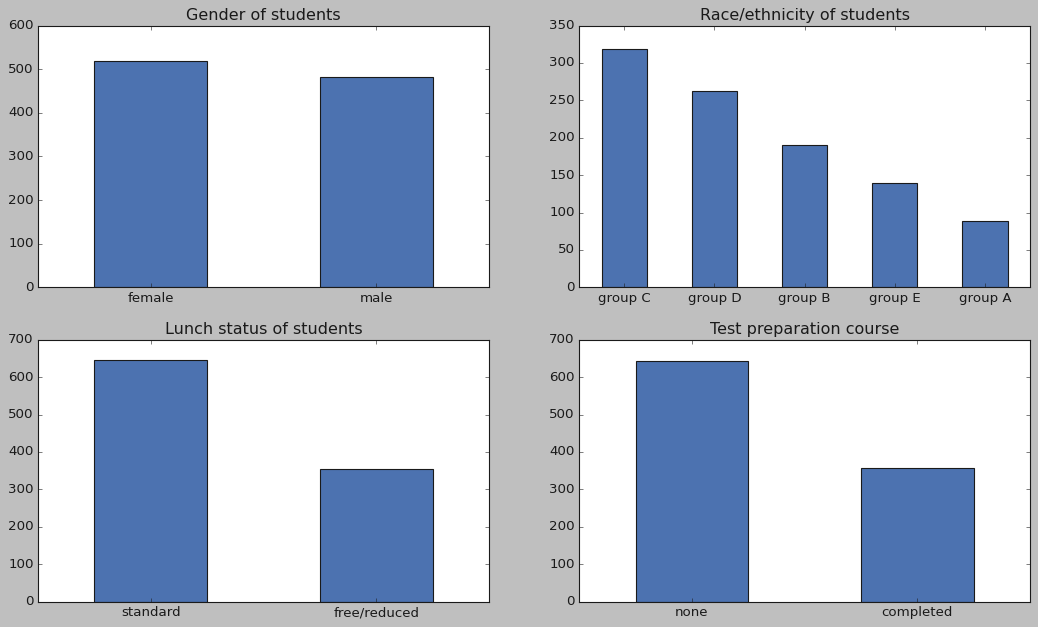

In [203]:
plt.subplot(221)

df['gender'].value_counts().plot(kind='bar', title='Gender of students', figsize=(16,9))

plt.xticks(rotation=0)

plt.subplot(222)

df['race/ethnicity'].value_counts().plot(kind='bar', title='Race/ethnicity of students')

plt.xticks(rotation=0)

plt.subplot(223)

df['lunch'].value_counts().plot(kind='bar', title='Lunch status of students')

plt.xticks(rotation=0)

plt.subplot(224)

df['test preparation course'].value_counts().plot(kind='bar', title='Test preparation course')

plt.xticks(rotation=0)

plt.show()

**Conclusion**: Females dominate males in writing and reading, indicating that while males dominate females in math, females dominate males in reading and writing. Students who received free or reduced-price lunches performed worse than those who had to pay for their lunches, indicating a link between nutrition and academic achievement. Students who completed exam preparation sessions outperformed their peers.